In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Resume Screening**

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

!pip install pytesseract
!pip install pdf2image
!apt-get install -y poppler-utils
!sudo apt install tesseract-ocr # Installing Tesseract OCR engine

import pytesseract
from pdf2image import convert_from_path
from PIL import Image

from google.colab import files #for uploading file


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (570 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
T

In [ ]:
df=pd.read_csv("ResumeDataset.csv")

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [ ]:
df.shape

(962, 2)

In [ ]:
print(df.columns)

Index(['Category', 'Resume'], dtype='object')


In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


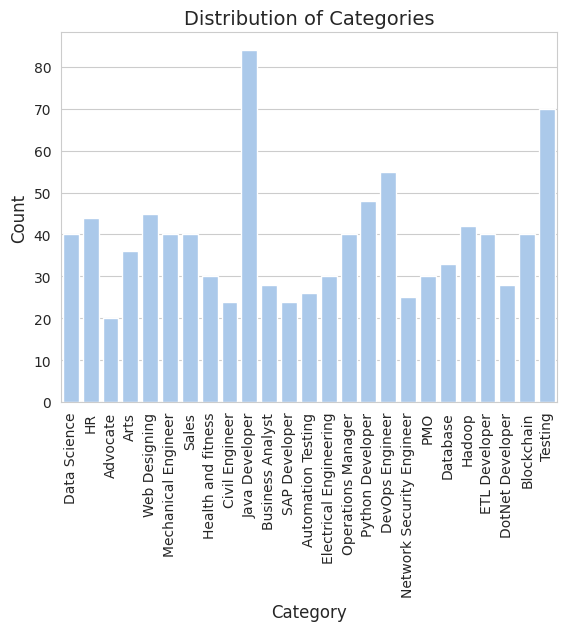

In [ ]:
sns.set_style("whitegrid")

sns.set_palette("pastel")

sns.countplot(data=df, x='Category')

plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Categories', fontsize=14)

plt.xticks(rotation=90)

plt.show()

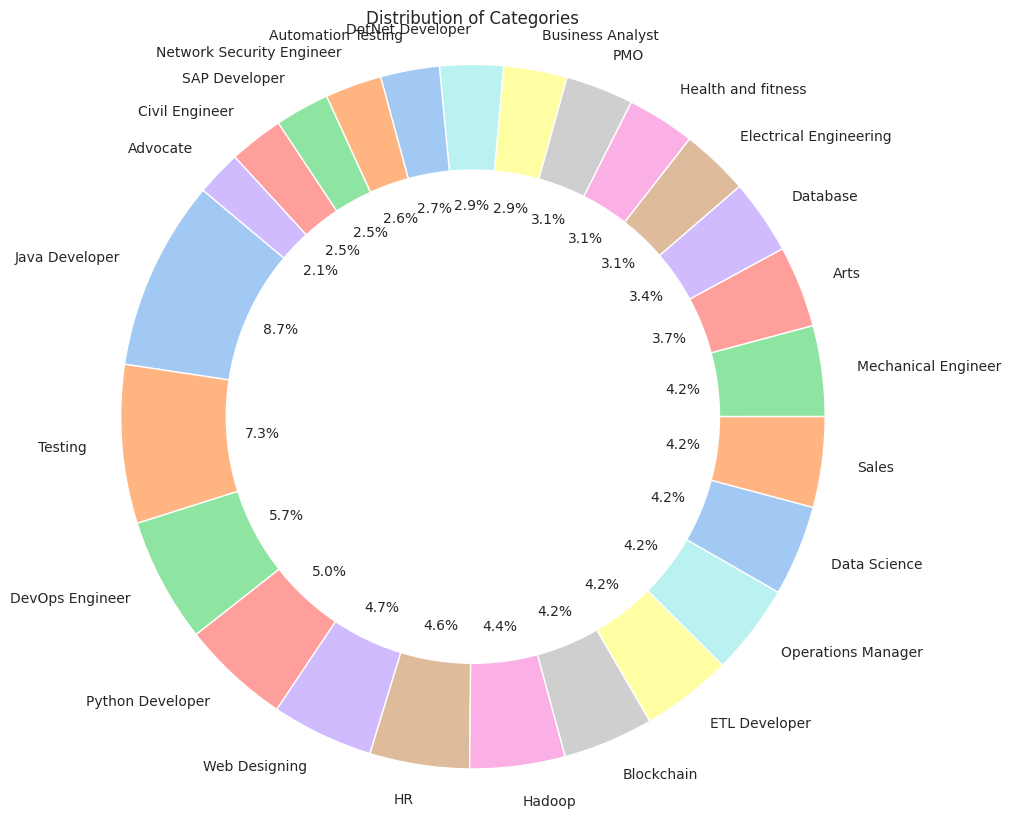

In [ ]:
 category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title('Distribution of Categories')

plt.show()

**Exploring Resume**

In [ ]:
df['Category'][0]

'Data Science'

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

**Cleaning resume**

In [ ]:
import re

In [ ]:
def clean_resume(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove @mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: clean_resume(x))


In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

**Words in categorical value**


*   making the category column into numbers for processing



In [ ]:
df1=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['Category'])
df1['Category_num'] = le.transform(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


**Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
required_text = tfidf.transform(df['Resume'])

In [ ]:
required_text

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

**Splitting**

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=42)

In [ ]:
print(f"X_train { X_train.shape}")
print(f"X_test { X_test.shape}")
print(f"y_train { y_train.shape}")
print(f"y_test { y_test.shape}")

X_train (769, 7351)
X_test (193, 7351)
y_train (769,)
y_test (193,)


**Train Model**

*KNN*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
param_grid = {'n_neighbors' : [3,5,7,8]}

In [ ]:
knn_classifier = KNeighborsClassifier()

In [ ]:
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 8]}, scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
# use the best parameters to initilize the classifier
best_k = best_params['n_neighbors']
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
# Train the KNN classifiers with the best parameters
best_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = best_knn_classifier.predict(X_test)

In [ ]:
class_report = classification_report(y_test, y_pred)

In [ ]:

print("Best Parameters:", best_params)
print("Best Score (CV Accuracy):", best_score)
print("Classification Report:")
print(class_report)

Best Parameters: {'n_neighbors': 3}
Best Score (CV Accuracy): 0.9740089975384093
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.

**Pickling Data**

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(best_knn_classifier,open('best_knn_classifier.pkl', 'wb'))

Reading resume using OCR

In [ ]:

nlp = spacy.load("en_core_web_sm")

#extract text from PDF using OCR
def pdf_to_text(pdf_path):
    images = convert_from_path(pdf_path)
    text = ""
    for img in images:
        text += pytesseract.image_to_string(img)
    return text

#clean and process the extracted text
def clean_resume(resume_text):
    return resume_text

print("Please upload your resume in PDF format:")
uploaded = files.upload()

for file_name in uploaded.keys():  #file name of pdf
    resume_pdf_path = file_name

resume_text = pdf_to_text(resume_pdf_path)
cleaned_resume_text = clean_resume(resume_text)

# `tfidf` is trained TF-IDF model and `clf` is trained classifier
with open('best_knn_classifier.pkl', 'rb') as f:
    clf = pickle.load(f)

input_features = tfidf.transform([cleaned_resume_text])
prediction_id = clf.predict(input_features)[0]

print(f"Given Resume is for: {df1[df1['Category_num'] == prediction_id]['Category'].iloc[0]}")


Please upload your resume in PDF format:


Saving Raj Resume PIC.pdf to Raj Resume PIC.pdf
Given Resume is for: Data Science


In [ ]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nlp = spacy.load("en_core_web_sm")

def extract_text(resume):
    return resume

def extract_keywords(job_description):
    return job_description

#computing cosine similarity between resume and job description
def compute_similarity(resume_text, job_description_text):
    vectorizer = CountVectorizer().fit_transform([resume_text, job_description_text])
    vectors = vectorizer.toarray()
    cosine_sim = cosine_similarity(vectors)[0, 1]
    return cosine_sim


def interpret_score(score):
    if score > 0.7:
        return "Excellent match"
    elif score > 0.5:
        return "Good match"
    elif score > 0.3:
        return "Fair match"
    else:
        return "Poor match"

def identify_relevant_missing_keywords(resume_text, job_description_text, relevant_keywords):
    job_description_doc = nlp(job_description_text)
    job_keywords = set(token.lemma_.lower() for token in job_description_doc if token.is_alpha)

    resume_doc = nlp(resume_text)
    resume_keywords = set(token.lemma_.lower() for token in resume_doc if token.is_alpha)

    missing_keywords = job_keywords - resume_keywords
    relevant_missing_keywords = [kw for kw in missing_keywords if kw in relevant_keywords]
    return relevant_missing_keywords

relevant_keywords_input = input("Enter relevant keywords for filtering (comma-separated): ")
relevant_keywords = set(relevant_keywords_input.lower().split(','))


resume_text = pdf_to_text(resume_pdf_path)
resume_text = clean_resume(resume_text)

job_description_text = input("Enter the job description of the company: ")

resume_text = extract_text(resume_text)
# print(resume_text)
job_description_text = extract_keywords(job_description_text)


similarity_score = compute_similarity(resume_text, job_description_text)

interpretation = interpret_score(similarity_score)
print(f"ATS Score (Cosine Similarity): {similarity_score:.2f}")
print(f"Interpretation: {interpretation}")

# Identify relevant missing keywords
relevant_missing_keywords = identify_relevant_missing_keywords(resume_text, job_description_text, relevant_keywords)
print(f"Relevant Missing Keywords: {', '.join(relevant_missing_keywords) if relevant_missing_keywords else 'None'}")

if relevant_missing_keywords:
    print("\nSuggestions to improve your resume:")
    print("1. Incorporate the relevant missing keywords into your resume where applicable.")
    print("2. Ensure that you address all the key skills and qualifications mentioned in the job description.")
else:
    print("\nYour resume already covers the key skills and qualifications from the job description.")

# Cosine similarity is commonly used in text analysis to measure the similarity between documents based on the frequency of words or phrases they contain.

Enter relevant keywords for filtering (comma-separated): java,cpp,datascience, developer, html,mongodb,python,css, sql
Enter the job description of the company: developer engineer software data scientist
ATS Score (Cosine Similarity): 0.11
Interpretation: Poor match
Relevant Missing Keywords: None

Your resume already covers the key skills and qualifications from the job description.


# **PLACEMENT PREDICTION**

**Reading Data**

In [ ]:
df = pd.read_csv("PlacementDataset.csv")


In [ ]:
df.sample(10)

,"Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot"
1740,"21,Male,Computer Science,2,5,0,0,0"
972,"21,Male,Civil,0,8,1,0,1"
1358,"26,Male,Computer Science,1,6,0,0,1"
621,"22,Male,Electrical,2,6,0,0,1"
927,"22,Male,Information Technology,2,8,0,0,1"
1046,"21,Male,Computer Science,2,8,0,0,1"
804,"22,Male,Computer Science,1,8,0,0,1"
1229,"21,Male,Information Technology,2,9,0,0,1"
1560,"24,Male,Mechanical,0,7,1,0,1"
894,"22,Male,Information Technology,0,7,0,0,1"


In [ ]:
df.drop_duplicates()

,"Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot"
0,"22,Male,Electronics And Communication,1,8,1,1,1"
1,"21,Female,Computer Science,0,7,1,1,1"
2,"22,Female,Information Technology,1,6,0,0,1"
3,"21,Male,Information Technology,0,8,0,1,1"
4,"22,Male,Mechanical,0,8,1,0,1"
...,...
2946,"23,Male,Information Technology,1,7,1,1,0"
2952,"23,Male,Mechanical,0,8,1,0,1"
2954,"23,Female,Computer Science,1,8,0,1,1"
2958,"23,Male,Computer Science,0,6,0,1,0"


In [ ]:
df.sample(2)


,"Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot"
1112,"21,Male,Computer Science,2,9,0,0,1"
22,"22,Male,Civil,0,7,0,0,0"


In [ ]:
print(df.columns)

Index(['Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot'], dtype='object')


**Graphs & charts**

<Axes: xlabel='Gender', ylabel='count'>

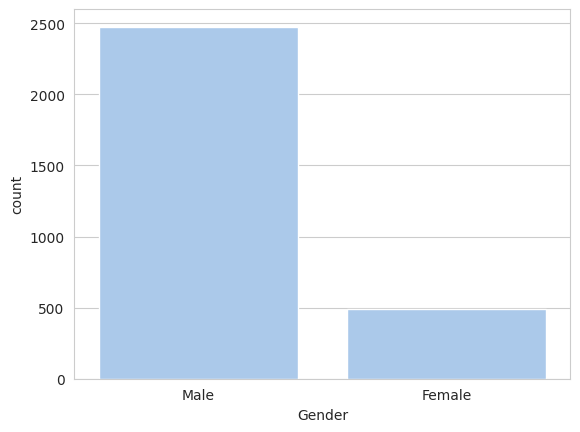

In [ ]:
df = df['Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot'].str.split(',', expand=True)

# Assigning column names
df.columns = ['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']

sns.countplot(x='Gender', data=df)


<ipython-input-45-5ab925245e87>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  numerical_df = df.apply(pd.to_numeric, errors='ignore').select_dtypes(include=['number'])


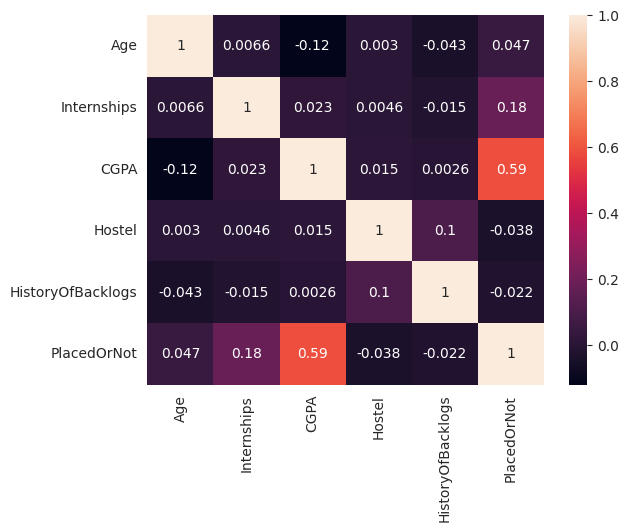

In [ ]:
numerical_df = df.apply(pd.to_numeric, errors='ignore').select_dtypes(include=['number'])

# Check if numerical_df is empty
if numerical_df.empty:
    print("No numerical columns found in the DataFrame. Cannot create correlation matrix.")
else:
    corr_matrix = numerical_df.corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.show()

In [ ]:

numeric_cols = ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# applying normalization
df_norm = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

In [ ]:
means = df_norm.mean()
print(means)

Age                 -9.965805e-16
Internships          5.749503e-17
CGPA                 2.635189e-16
Hostel               5.390159e-17
HistoryOfBacklogs   -2.036282e-17
PlacedOrNot         -1.916501e-17
dtype: float64


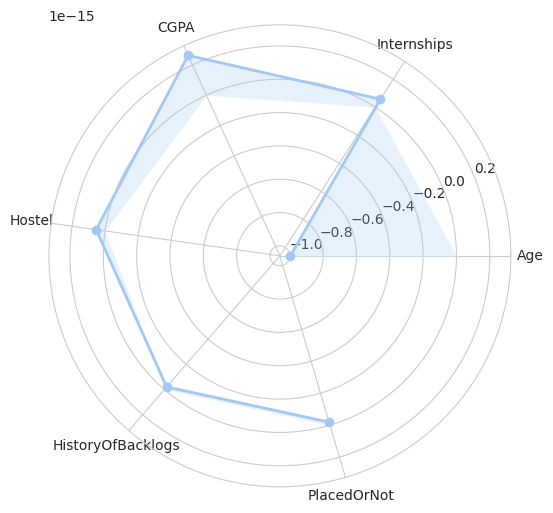

In [ ]:

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(means.index, means.values, 'o-', linewidth=2)
ax.fill_between(means.index, means.values, alpha=0.25)
plt.show()

Text(0.5, 1.0, 'Stream')

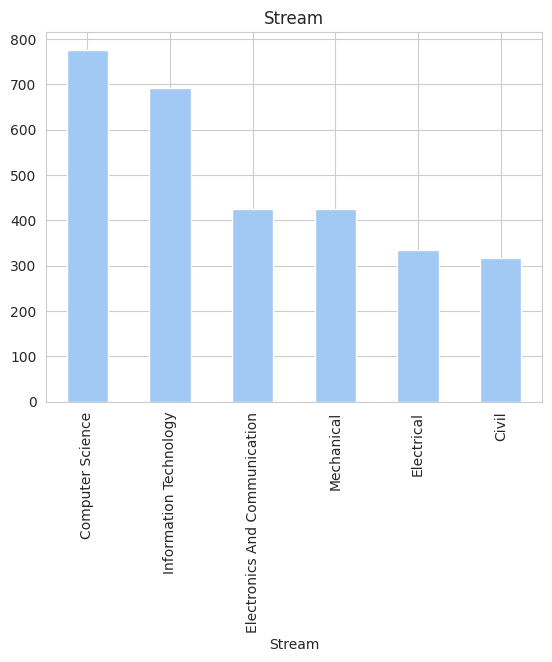

In [ ]:
fig = df ['Stream'].value_counts().plot.bar()
fig.set_title('Stream')

<Axes: xlabel='Stream', ylabel='PlacedOrNot'>

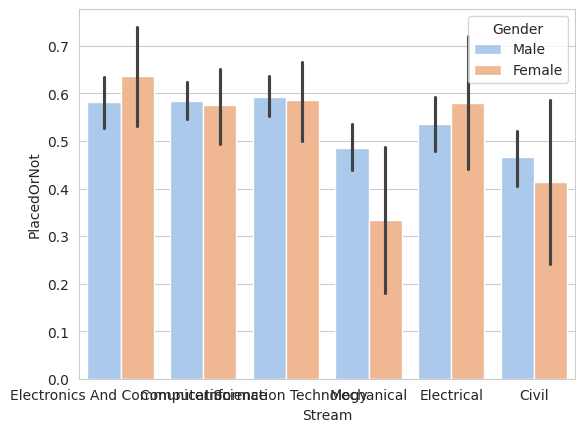

In [ ]:
sns.barplot(data=df, x="Stream", y="PlacedOrNot",hue ="Gender")

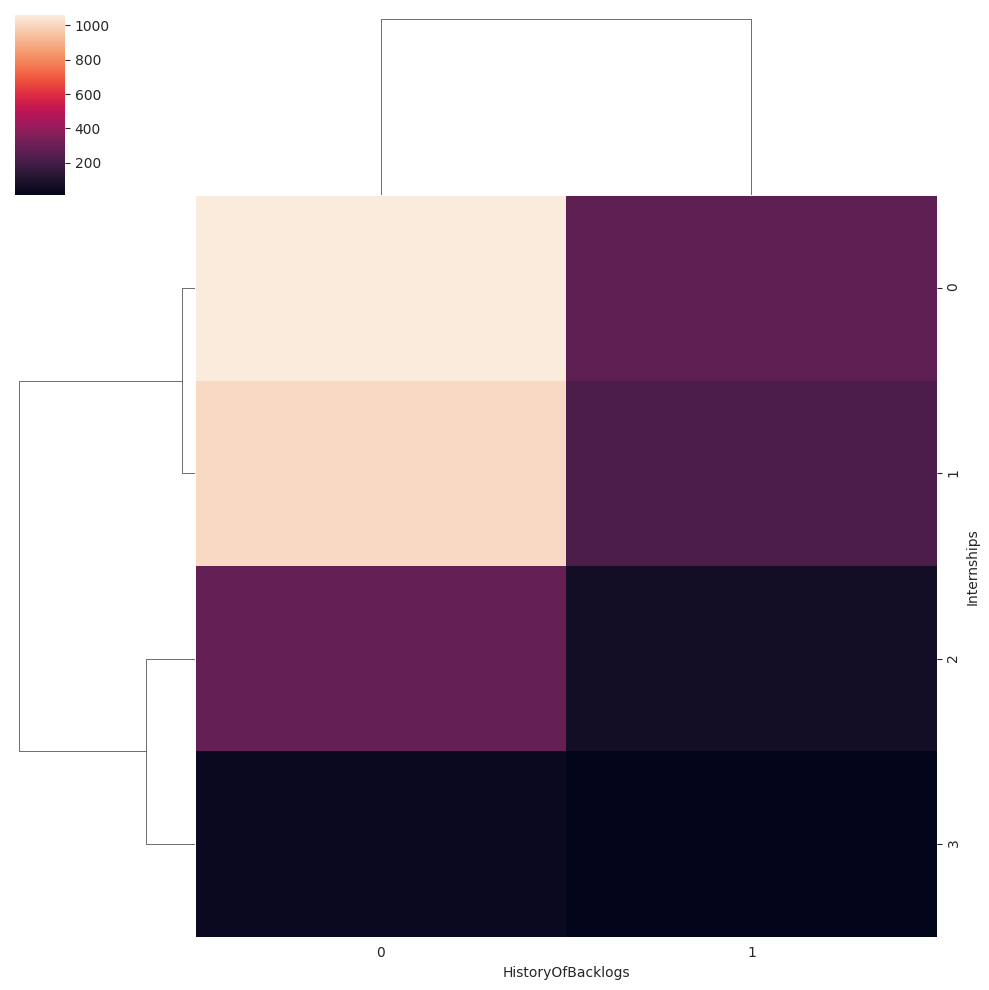

In [ ]:
sns.clustermap(pd.crosstab(df['Internships'],df['HistoryOfBacklogs']))

**Feature Engineering**

In [ ]:
categorical_cols = ['Gender', 'Stream']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
array_hot_encoded = ohe.fit_transform(df[categorical_cols])

In [ ]:
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

In [ ]:
data_other_cols = df.drop(columns=categorical_cols)

In [ ]:
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
y = df.PlacedOrNot
X = df.drop(['PlacedOrNot'],axis =1)

**Training Dataset**

In [ ]:

X = df[['CGPA', 'Internships']]
y = df['PlacedOrNot']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
X_train

,CGPA,Internships
2458,8,1
509,7,0
1370,7,0
1352,7,1
1779,8,1
...,...,...
1638,8,3
1095,6,1
1130,8,1
1294,7,0


**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[201  79]
 [ 79 235]]
0.734006734006734
Accuracy: 77.99 %
Standard Deviation: 1.43 %


**SVC**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred2 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
print(accuracy_score(y_test, y_pred2))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[201  79]
 [ 79 235]]
0.734006734006734
Accuracy: 77.99 %
Standard Deviation: 1.43 %


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
print(accuracy_score(y_test, y_pred3))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[268  12]
 [ 82 232]]
0.8417508417508418
Accuracy: 84.61 %
Standard Deviation: 2.19 %


**Random Forest Clasification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred4 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
print(accuracy_score(y_test, y_pred4))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[267  13]
 [ 82 232]]
0.8400673400673401
Accuracy: 84.61 %
Standard Deviation: 2.15 %


**Best model**

In [ ]:
# from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

svc_model = SVC()
svc_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

models = {
    'Logistic Regression': logistic_model,
    'Random Forest': random_forest_model,
    'SVC': svc_model,
    'KNN': knn_model
}

# Dictionary to store model accuracies
model_accuracies = {}

# Calculating accuracy
for model_name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_accuracies[model_name] = accuracy

best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]
print(f"The best model is: {best_model_name} with accuracy: {model_accuracies[best_model_name]}")


The best model is: KNN with accuracy: 0.8417508417508418


**Pickiling Data**

In [ ]:

with open('best_placement_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [ ]:

with open('best_placement_model.pkl', 'wb') as file:
    pickle.dump(model, file)


**Predicting the output**

In [ ]:
with open('best_placement_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

cgpa = float(input("Enter the student's CGPA: "))
internships = int(input("Enter the number of internships: "))

input_data = pd.DataFrame([[cgpa, internships]], columns=['CGPA', 'Internships'])

# Predicting placement outcome
placement_prediction = loaded_model.predict(input_data)

if placement_prediction[0] == 1:
    print("The student is likely to get placed.")
else:
    print("The student is not likely to get placed.")


Enter the student's CGPA: 7
Enter the number of internships: 2
The student is likely to get placed.
